In [1]:
#Import libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Read the data
df = pd.read_csv("playlist_2010to2022.csv")

In [3]:
# List the data types 
df.dtypes

playlist_url          object
year                   int64
track_id              object
track_name            object
track_popularity       int64
album                 object
artist_id             object
artist_name           object
artist_genres         object
artist_popularity      int64
danceability         float64
energy               float64
key                  float64
loudness             float64
mode                 float64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
duration_ms          float64
time_signature       float64
dtype: object

In [4]:
# Check if there's any NA values
df.isna().sum()

playlist_url         0
year                 0
track_id             0
track_name           0
track_popularity     0
album                0
artist_id            0
artist_name          0
artist_genres        0
artist_popularity    0
danceability         1
energy               1
key                  1
loudness             1
mode                 1
speechiness          1
acousticness         1
instrumentalness     1
liveness             1
valence              1
tempo                1
duration_ms          1
time_signature       1
dtype: int64

In [5]:
# Check for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2295    False
2296    False
2297    False
2298    False
2299    False
Length: 2300, dtype: bool

In [6]:
# Remove NA values
df.dropna(inplace = True)

In [7]:
# Get Track Popularity and Duration Dataset
dataset = df.loc[:,["track_popularity","duration_ms"]]
dataset.head()

,track_popularity,duration_ms
0,91,266773.0
1,84,167067.0
2,69,250547.0
3,88,216880.0
4,74,200400.0


In [8]:
dataset.shape

(2299, 2)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2299 entries, 0 to 2299
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_popularity  2299 non-null   int64  
 1   duration_ms       2299 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 53.9 KB


In [10]:
# Rename the cols
dataset.columns = ['popularity', 'duration']
dataset.head()

,popularity,duration
0,91,266773.0
1,84,167067.0
2,69,250547.0
3,88,216880.0
4,74,200400.0


In [11]:
dataset.describe()

,popularity,duration
count,2299.000000,2299.000000
mean,70.944759,226033.494128
std,12.294047,42063.678588
min,0.000000,97393.000000
25%,66.000000,200179.500000
50%,72.000000,221653.000000
75%,79.000000,245950.000000
max,100.000000,688453.000000


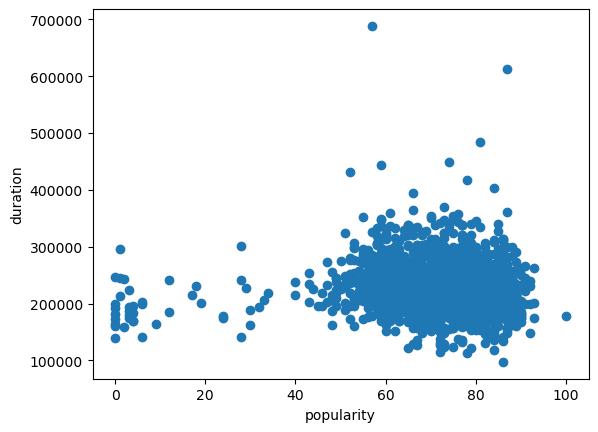

In [12]:
# Visuallise data using scatter plot
plt.scatter(dataset['popularity'],dataset['duration'])
plt.xlabel('popularity')
plt.ylabel('duration')
plt.show()

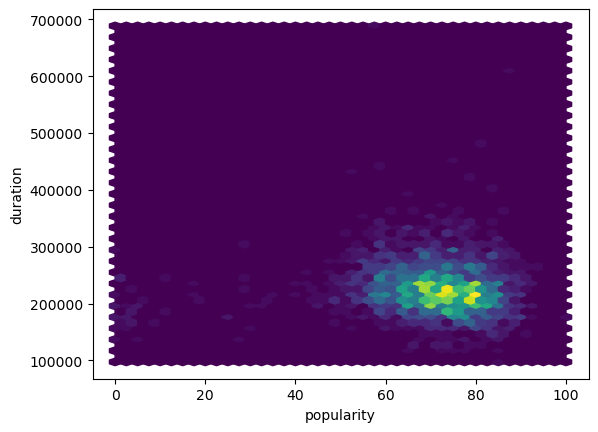

In [13]:
# Visualise data using hexbin plot
plt.hexbin(dataset['popularity'],dataset['duration'], gridsize=(40,30))
plt.xlabel('popularity')
plt.ylabel('duration')
plt.show()

In [76]:
# Analyse Track Popularity by Artist Popularity
new_dataset = df.loc[:,['track_popularity','artist_popularity']]
new_dataset.head()

,track_popularity,artist_popularity
0,91,86
1,84,75
2,69,61
3,88,83
4,74,65


In [77]:
# Rename cols
new_dataset.columns = ['track_pop','artist_pop']

In [16]:
# import ML model
from sklearn import metrics

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

In [48]:
y = new_dataset.track_pop.values.reshape(-1,1)
x = new_dataset[['artist_pop']].values.reshape(-1,1)

In [49]:
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [50]:
# Fit the linear regression model
linr_model = LinearRegression().fit(x_train,y_train)
linr_model

LinearRegression()

In [51]:
print(linr_model.intercept_)
print(linr_model.coef_)

[45.9004287]
[[0.34552832]]


In [52]:
y_pred = linr_model.predict(x_test)

In [53]:
# Evaluate the model
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("R2 Score: ", metrics.r2_score(y_test, y_pred))

Mean Absolute Error:  7.788325173725375
Mean Squared Error:  157.6901454739515
R2 Score:  0.06404308153300342


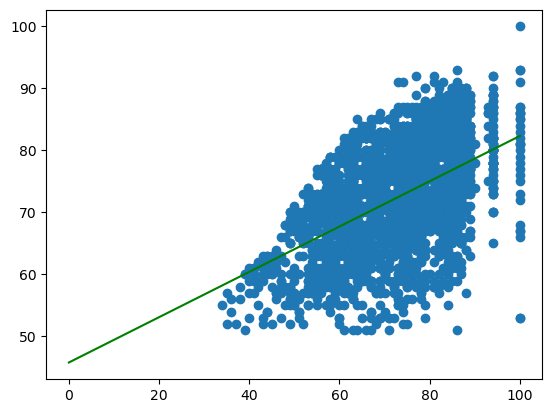

In [79]:
# Plot the resulting line
plt.scatter(new_dataset['artist_pop'],new_dataset['track_pop'])
x = np.linspace(0, 100, 1000)
plt.plot(x, x*linr_model.coef_[0] + linr_model.intercept_, color = "green")
plt.xlabel = 'track_popularity'
plt.ylabel = 'artist_popularity'
plt.show()

In [78]:
# Remove outlier to improve prediction
def remove_outliers(dataframe):
    return dataframe.loc[dataframe['track_pop'] >= 51]
new_dataset = remove_outliers(new_dataset)
len(new_dataset)

2229

In [80]:
# Re-apply linear regression model
y = new_dataset.track_pop.values.reshape(-1,1)
x = new_dataset[['artist_pop']].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

linr_model = LinearRegression().fit(x_train,y_train)

In [81]:
# Re-evaluate model
y_pred = linr_model.predict(x_test)
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("R2 Score: ", metrics.r2_score(y_test, y_pred))

Mean Absolute Error:  5.835785431029644
Mean Squared Error:  51.186527892368275
R2 Score:  0.34561623662515506


In [82]:
from sklearn.utils.fixes import parse_version, sp_version

# This is line is to avoid incompatibility if older SciPy version.
# You should use `solver="highs"` with recent version of SciPy.
solver = "highs" if sp_version >= parse_version("1.6.0") else "interior-point"
y = new_dataset.track_pop
x = new_dataset[['artist_pop']]

In [84]:
from sklearn.linear_model import QuantileRegressor

quantiles = [0.05, 0.5, 0.95]
predictions = {}
# x,y values for the mean line
x_0 = np.linspace(30, 100, 2229)
y_true_mean = x_0*linr_model.coef_[0] + linr_model.intercept_

# set the default outbound predictions to all zeros
out_bounds_predictions = np.zeros_like(y_true_mean, dtype=np.bool_)

x = np.array(x).reshape(-1,1)
# Draw lines and sections for each quantile
for quantile in quantiles:
    # Fit the model and find the fitted line for each quantile
    qr = QuantileRegressor(quantile=quantile, alpha=0, solver=solver)
    y_pred = qr.fit(x, y).predict(x)
    predictions[quantile] = y_pred

    if quantile == min(quantiles):
        out_bounds_predictions = np.logical_or(
            out_bounds_predictions, y_pred >= y
        )
    elif quantile == max(quantiles):
        out_bounds_predictions = np.logical_or(
            out_bounds_predictions, y_pred <= y
        )

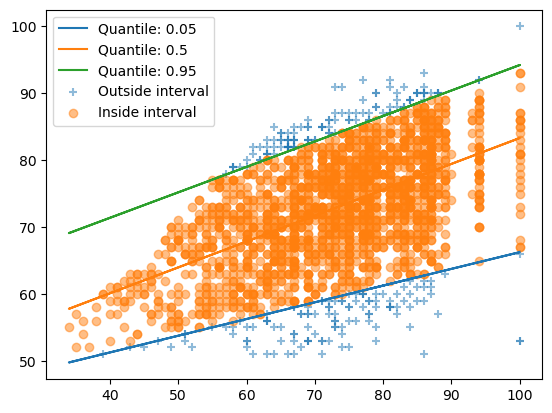

In [85]:

# Plot the result
for quantile, y_pred in predictions.items():
    plt.plot(x, y_pred, label=f"Quantile: {quantile}")

# outside the interval
plt.scatter(
    x[out_bounds_predictions],
    y[out_bounds_predictions],
    marker="+",
    alpha=0.5,
    label="Outside interval", 
)
# inside the interval
plt.scatter(
    x[~out_bounds_predictions],
    y[~out_bounds_predictions],
    alpha=0.5,
    label="Inside interval",
)

plt.legend()
plt.show()